In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tweets_train = pd.read_csv("twitter_training.csv")
tweets_valid = pd.read_csv("twitter_validation.csv")

In [20]:
df = pd.read_csv('twitter_training.csv', encoding='utf-8')
df = df.drop(columns=['2401','Borderlands'])
df = df.rename(columns={'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'talks'})
df = df.reindex(columns=['talks','Sentiment'])
df.dropna(inplace=True)

In [3]:
column_name=['tweetID','entity','sentiment','tweet_content']
tweets_train.columns=column_name
tweets_valid.columns=column_name
tweets=pd.concat([tweets_train,tweets_valid],ignore_index=False)
tweets.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
tweets.columns.tolist()

['tweetID', 'entity', 'sentiment', 'tweet_content']

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        75682 non-null  int64 
 1   entity         75682 non-null  object
 2   sentiment      75682 non-null  object
 3   tweet_content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [6]:
tweets.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [7]:
tweets.duplicated().sum()

3217

In [8]:
tweets.dropna(inplace=True)
tweets.drop_duplicates(inplace=True)
print("null values:","\n",tweets.isnull().sum())
print("duplicated values:",tweets.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


In [9]:
tweets.drop(columns=['tweetID','tweet_content'],inplace=True)
tweets.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72139 entries, 0 to 996
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     72139 non-null  object
 1   sentiment  72139 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


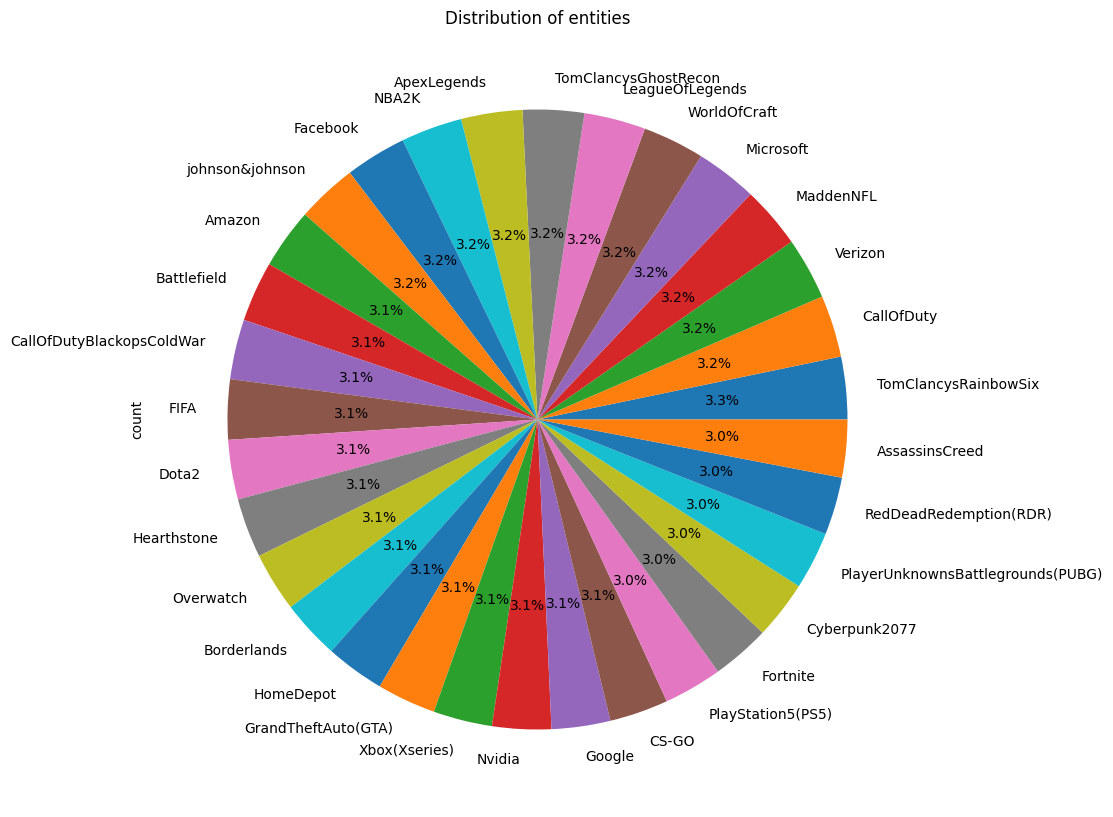

In [11]:
entity_content=tweets['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

<Axes: xlabel='sentiment'>

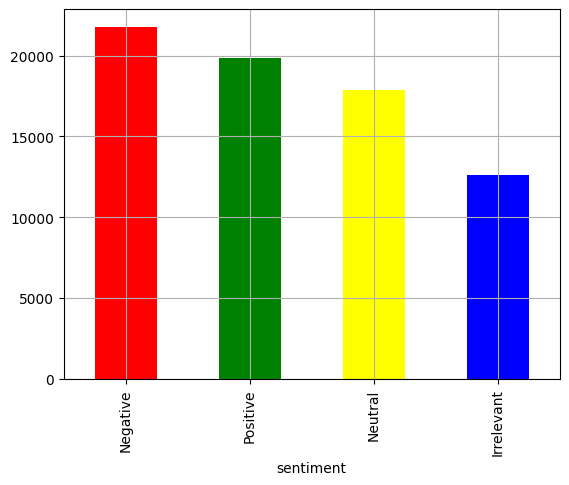

In [12]:
sentiment_content=tweets['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = ['red','green','yellow','blue']
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='entity'>

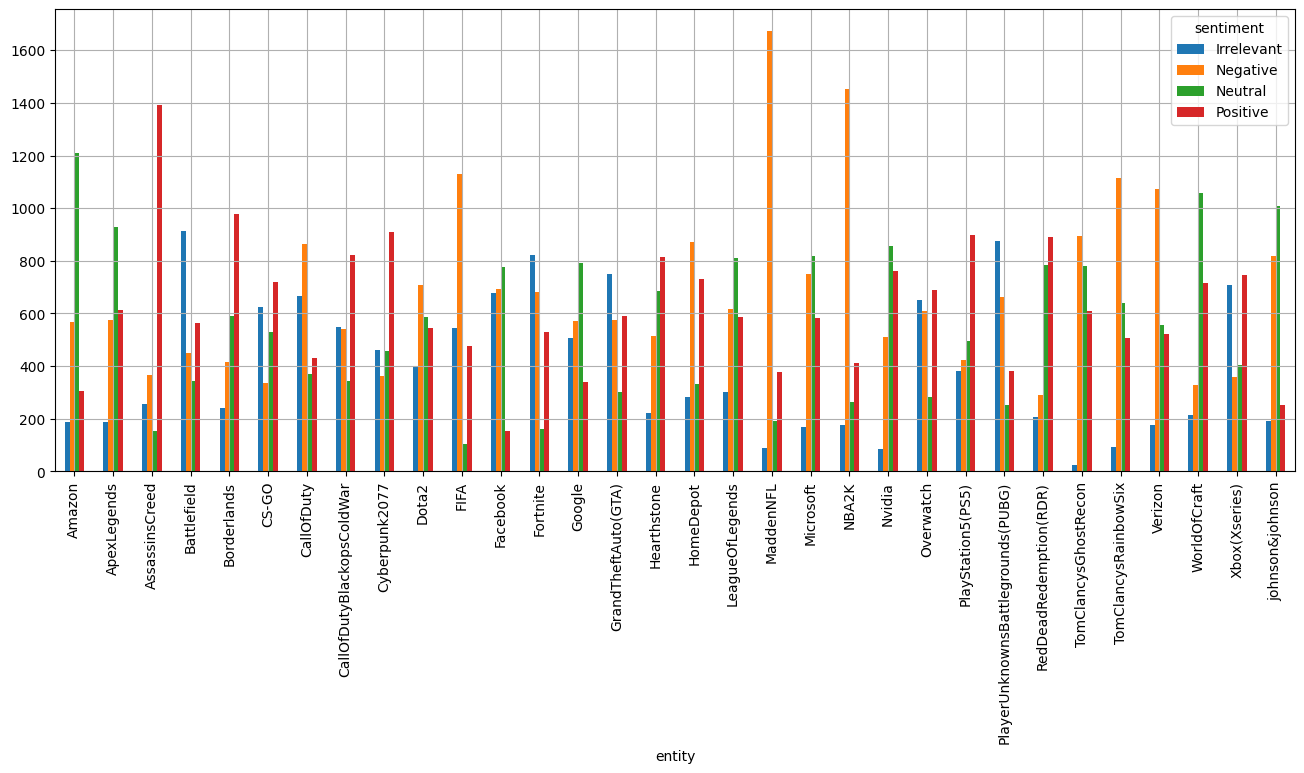

In [13]:
reactions_entities = pd.crosstab(tweets['entity'],tweets['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Handle Missing Values (Replace NaN with an empty string)
df['talks'].fillna('', inplace=True)

# Step 3: Vectorize Text Data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Choose the number of features as needed
X = tfidf_vectorizer.fit_transform(df['talks']).toarray()
y = df['Sentiment']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance on the training data
y_pred_train = model.predict(X_train)

# Print accuracy and other metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))